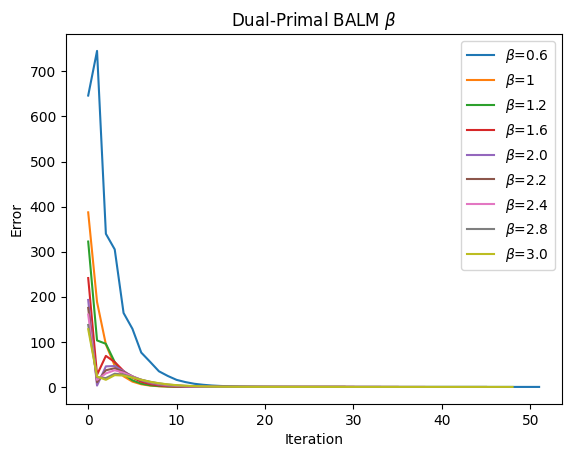

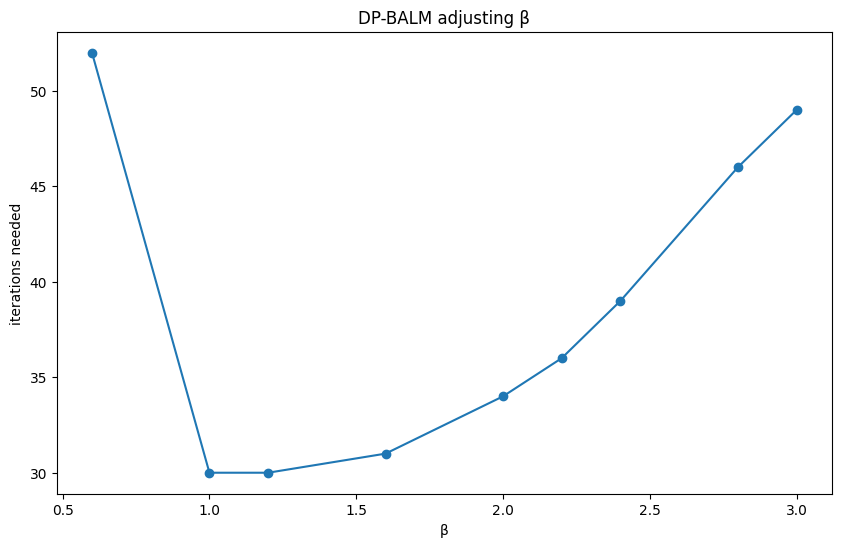

In [23]:
import numpy as np
import pyproximal
import pylops
import matplotlib.pyplot as plt
def f(x):
    return x.T @ x
def x_step_prox(q0k):
    quad = pyproximal.Quadratic(Op=pylops.MatrixMult(np.identity(H0.shape[0])))
    xk1 = pyproximal.optimization.primal.ProximalPoint(quad, q0k, r, show=False, niter=1)
    return xk1
def DP_BALM(A, b, alpha, beta, x0, lambda0):
    xk = x0
    lambdak = lambda0
    improvement = []
    for i in range(100):
        lambdak_bar = lambdak - H0_inv @ (A @ xk - b)
        q0k = xk + (1/beta) * A.T @ (2 * lambdak_bar - lambdak)
        xk_bar = x_step_prox(q0k)
        xk1 = xk + alpha*(xk_bar - xk)
        lambdak1 = lambdak + alpha*(lambdak_bar - lambdak)
        error = np.linalg.norm(xk - xk1)
        improvement.append(error)
        if error < 1e-6:
            return xk1, improvement
        xk = xk1
        lambdak = lambdak1
    return xk, improvement
A = np.array([[1, 2, -3, 4, 5, 6, 7, 8],
            [-11, 12, 13, 14, 15, 16, 17, 18],
            [21, -22, 23, 24, 25, 26, -27, 28],
            [31, 32, 33, -34, 35, 36, 37, 38],
            [41, 42, 43, 44, 45, 46, 47, 48],
            [51, 52, -53, 54, 55, 56, 57, 58],
            [61, 62, 63, 64, -65, 66, 67, 68], 
            [71, 72, 73, 74, 75, 76, 77, 78]])
b = np.array([ 186,  542,  458 ,1012, 1644, 1686, 1714, 2724])
r = beta = 1
alpha = 1
delta = 0.001 
x0 = np.ones_like(b)
lambda0 = np.ones_like(b)
beta_=[]
range_ = [0.6, 1, 1.2, 1.6,2.0,2.2,2.4,2.8,3.0]
for beta in range_:
    xk, improvement = DP_BALM(A,b,alpha,beta,x0,lambda0)
    beta_.append(len(improvement))
    #plt.plot(improvement, label=f"$\\alpha$={alpha}")
    plt.plot(improvement, label=f"$\\beta$={beta}")

# for alpha in range_:
#     xk, improvement = DP_BALM(A,b,alpha,beta,x0,lambda0)
#     beta_.append(len(improvement))
#     #plt.plot(improvement, label=f"$\\alpha$={alpha}")
#     plt.plot(improvement, label=f"$\\beta$={beta}")

plt.xlabel("Iteration")
plt.ylabel("Error")
#plt.yscale("log")
plt.title("Dual-Primal BALM $\\beta$")
plt.legend()
plt.show()
y = beta_
x = range_
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', label='Data')
plt.title('DP-BALM adjusting β')
plt.xlabel('β')
plt.ylabel('iterations needed')
plt.show()